# Analysis of Qiime2 output 

In [9]:
# import analysis functions
import analysis_functions as af
# enable in-line plotting
%matplotlib inline
# import libraries used in analysis
import zipfile
import pandas as pd
import seaborn as sns

In [10]:
# set data directory - i.e. where the main output of the qiime commands are stored
data_dir = "/home/adamsorbie/data_win/16S/iScience-review/analysis/qiime2/"

### Load data

In [11]:
# Since qiime2 artifacts are just zip files we can get the unzipped contents using Zipfile 
# alpha-diversity
r_zf = zipfile.ZipFile(data_dir + "core-metrics-phylo-results/observed_features_vector.qza")
s_zf = zipfile.ZipFile(data_dir + "core-metrics-phylo-results/shannon_vector.qza")
fpd_zf = zipfile.ZipFile(data_dir + "core-metrics-phylo-results/faith_pd_vector.qza")
# beta-diversity
gu_zf = zipfile.ZipFile(data_dir + "core-metrics-phylo-results/GUnifrac_distance_matrix.qza")
# differential abundance 
ac_zf = zipfile.ZipFile(data_dir + "ANCOM/ancom-bc_res.qza")
tax_zf = zipfile.ZipFile(data_dir + "taxonomy.qza")

In [12]:
# Pandas read.csv combined with Zipfile lets us open the tsv files as pandas dataframe
# alpha-diversity
richness = pd.read_csv(r_zf.open(af.get_zip_name(r_zf) + '/data/alpha-diversity.tsv'), sep="\t", index_col=0)
shannon = pd.read_csv(s_zf.open(af.get_zip_name(s_zf) + '/data/alpha-diversity.tsv'), sep="\t", index_col=0)
faiths = pd.read_csv(fpd_zf.open(af.get_zip_name(fpd_zf) + '/data/alpha-diversity.tsv'), sep="\t", index_col=0)
# beta-diversity
gunifrac = pd.read_csv(gu_zf.open(af.get_zip_name(gu_zf) + '/data/distance-matrix.tsv'), sep="\t", index_col=0)
# differential abundance 
ancom_res = pd.read_csv(ac_zf.open(af.get_zip_name(ac_zf) + '/data/differentials.tsv'),names=["beta", "se", "W", "p-value", "q-value"], sep="\t", index_col=0, header=0)
taxonomy = pd.read_csv(tax_zf.open(af.get_zip_name(tax_zf) + '/data/taxonomy.tsv'), sep="\t", index_col=0)

# metadata
metadata = pd.read_csv(data_dir + "Metadata-16S-sequenced_wo_ctrls.txt", sep="\t", index_col=0)


### Alpha-diversity

In [15]:
# Convert shannon to shannon effective since Qiime2 does not calculate this by default. 
# See discussion here for calculation: https://forum.qiime2.org/t/how-are-diversity-measures-calculated-in-qiime/6973/4
shannon["Shannon.E"] = 2** shannon.shannon_entropy 

In [16]:
# Here we join all of the alpha diversity results and metadata into one dataframe
alphadiv = pd.concat([richness, shannon, faiths, metadata], axis=1)
# define pairs for stats
pairs=[("Sham", "Stroke")]

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Sham vs. Stroke: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=3.600e+01


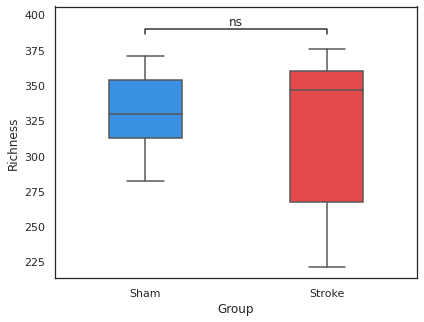

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Sham vs. Stroke: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=3.600e+01


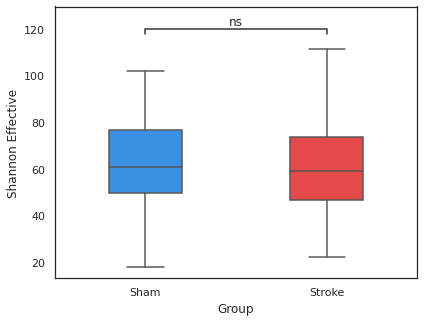

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Sham vs. Stroke: Mann-Whitney-Wilcoxon test two-sided, P_val:6.058e-01 U_stat=4.200e+01


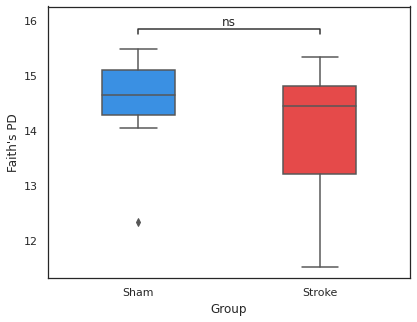

In [7]:
# plotting 

# define metrics
alpha_metrics = ["observed_features", "Shannon.E", "faith_pd"]
# increase font size on plots since default is small 
sns.set(font_scale=1.25)
# set fig size
sns.set(rc={'figure.figsize':(6.5,5)})
# set background colour
sns.set_style("white")
# define colours 
cols = ["#1e90ff", "#ff3030"]

# here we create a dictionary of labels to use as axis titles for each metric
labs = {"observed_features":"Richness", "Shannon.E": "Shannon Effective", "faith_pd":"Faith's PD"}

# use the calc alpha function to plot and calculate stats
af.plot_alpha(alphadiv, alpha_metrics, "Group", cols, labs,pairs)

### Beta-diversity

In [8]:
# calculate betadiversity ordination and permanova
nmds_metadata, permanova = af.ordinate(gunifrac,metadata, group="Group")

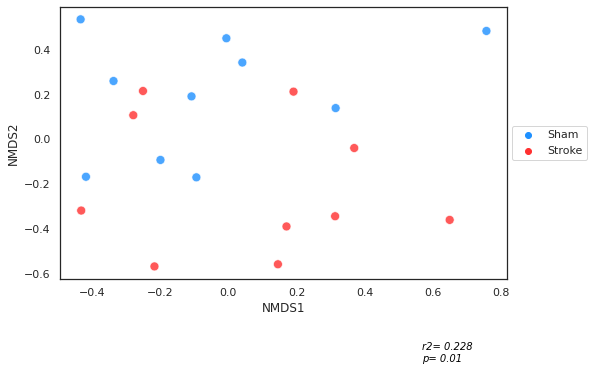

In [9]:
# plot beta-diversity 
# set styles and figure size
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("white")

af.plot_beta_div(nmds_metadata, permanova, group="Group", ord_method="NMDS", cols=cols)

### Differential abundance

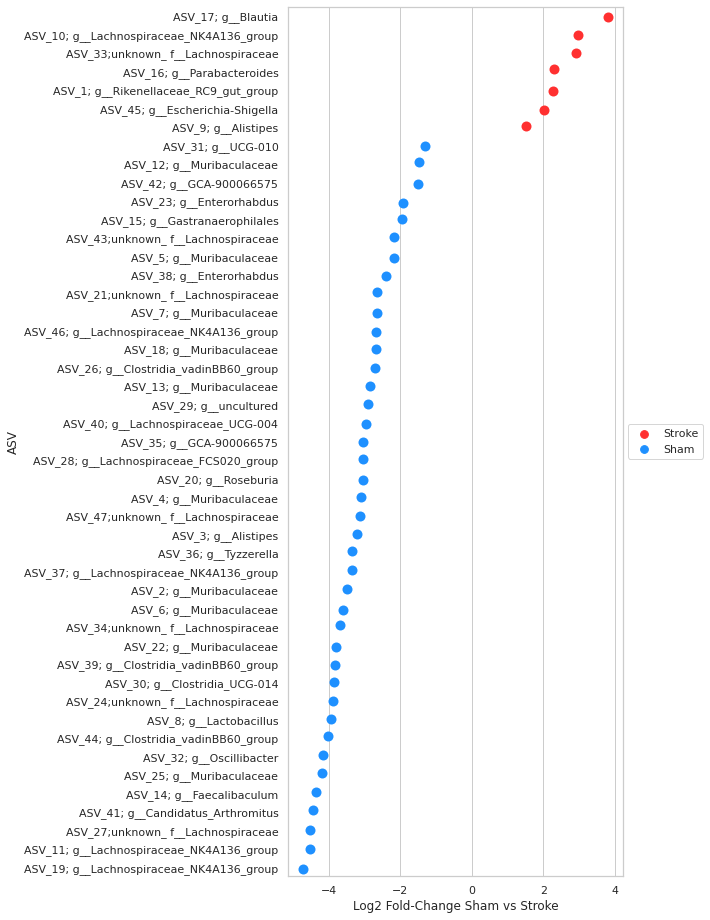

In [10]:
# change figure size
sns.set(rc={'figure.figsize':(6,16)})
# set style again
sns.set_style("whitegrid")
# plot ancom results
ancom_plot = af.plot_ancom(ancom_res, metadata, taxonomy, groups=["Sham", "Stroke"], cols=reversed(cols))